In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from skimage.transform import radon, rescale, iradon, rotate

## Pregunta 1

In [2]:
# creamos una grilla con valores de x e y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

xx, yy = np.meshgrid(x, y)

In [3]:
def cuadrado(x, y, l):
    return (abs(x) < l / 2) * (abs(y) < l / 2)

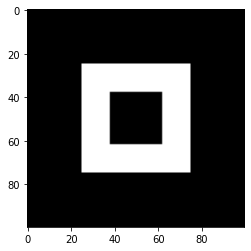

In [4]:
figura = cuadrado(xx, yy, 1) ^ cuadrado(xx, yy, 0.5)
plt.imshow(figura, cmap = 'gray')
plt.show()


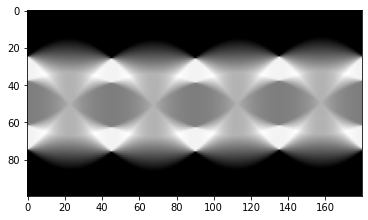

In [5]:
theta = np.linspace(0., 360., 180, endpoint=False)
sinogram = radon(figura, theta=theta, preserve_range=True)
plt.imshow(sinogram, cmap='gray')

In [6]:
fovs = ((2, 2), (1, 2), (0.5, 2), (0.5, 1))

In [7]:
def determinar_k(fov_x, fov_y):
    return (2 * np.pi / fov_x, 2 * np.pi / fov_y)

In [8]:
lista_k = []

for fov in fovs:
    kx, ky = determinar_k(fov[0], fov[1])
    lista_k.append((kx, ky))
    print(f'FOV = {fov}: kx = {round(kx, 4)}, ky = {round(ky, 4)}')

FOV = (2, 2): kx = 3.1416, ky = 3.1416
FOV = (1, 2): kx = 6.2832, ky = 3.1416
FOV = (0.5, 2): kx = 12.5664, ky = 3.1416
FOV = (0.5, 1): kx = 12.5664, ky = 6.2832


In [9]:
deltas = ((0.25, 0.25), (0.05, 0.05), (0.01, 0.01))

In [10]:
def determinar_n(kx, ky, dx, dy):
    return (2 * np.pi / (kx * dx), 2 * np.pi / (ky * dy))

In [11]:
for delta in deltas:
    dx, dy = delta[0], delta[1]
    for k in lista_k:
        kx, ky = k[0], k[1]
        nx, ny = determinar_n(kx, ky, dx, dy)
        kx_max = nx * kx / 2
        ky_max = ny * ky / 2
        print(f'kx = {round(kx, 4)}, ky = {round(ky, 4)}, dx = {dx}, dy = {dy}: ' \
            f'nx = {round(nx, 1)}, ny = {round(ny, 1)}')

    print(f'kx_max = {round(kx_max, 4)}, ky_max = {round(ky_max, 4)}\n')

kx = 3.1416, ky = 3.1416, dx = 0.25, dy = 0.25: nx = 8.0, ny = 8.0
kx = 6.2832, ky = 3.1416, dx = 0.25, dy = 0.25: nx = 4.0, ny = 8.0
kx = 12.5664, ky = 3.1416, dx = 0.25, dy = 0.25: nx = 2.0, ny = 8.0
kx = 12.5664, ky = 6.2832, dx = 0.25, dy = 0.25: nx = 2.0, ny = 4.0
kx_max = 12.5664, ky_max = 12.5664

kx = 3.1416, ky = 3.1416, dx = 0.05, dy = 0.05: nx = 40.0, ny = 40.0
kx = 6.2832, ky = 3.1416, dx = 0.05, dy = 0.05: nx = 20.0, ny = 40.0
kx = 12.5664, ky = 3.1416, dx = 0.05, dy = 0.05: nx = 10.0, ny = 40.0
kx = 12.5664, ky = 6.2832, dx = 0.05, dy = 0.05: nx = 10.0, ny = 20.0
kx_max = 62.8319, ky_max = 62.8319

kx = 3.1416, ky = 3.1416, dx = 0.01, dy = 0.01: nx = 200.0, ny = 200.0
kx = 6.2832, ky = 3.1416, dx = 0.01, dy = 0.01: nx = 100.0, ny = 200.0
kx = 12.5664, ky = 3.1416, dx = 0.01, dy = 0.01: nx = 50.0, ny = 200.0
kx = 12.5664, ky = 6.2832, dx = 0.01, dy = 0.01: nx = 50.0, ny = 100.0
kx_max = 314.1593, ky_max = 314.1593



In [19]:
def u_transform(x, y, a = 1):
    return (np.sinc(x / a) * np.sinc(y / a)) / (a ** 2)

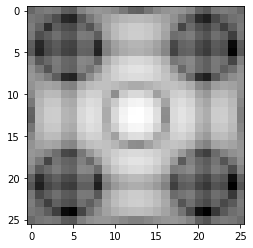

In [105]:
x1 = np.arange(-np.pi, np.pi, 0.25)
y1 = np.arange(-np.pi, np.pi, 0.25)

xx1, yy1 = np.meshgrid(x1, y1)

fig1 = u_transform(xx1, yy1) - u_transform(xx1, yy1, 2)
plt.imshow(np.log10(abs(fig1)), cmap = 'gray')
plt.show()

In [17]:
def fftc(X):
    return fftshift(fft2(ifftshift(X)))
def ifftc(X):
    return fftshift(ifft2(ifftshift(X)))

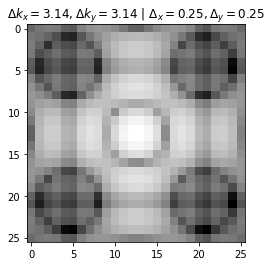

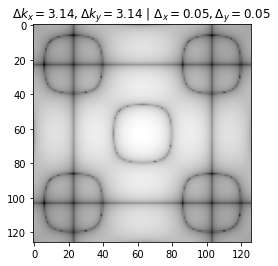

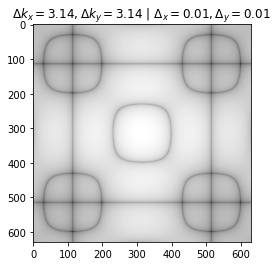

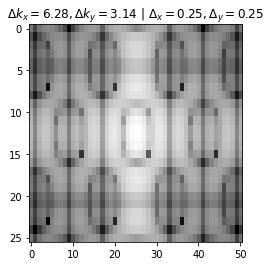

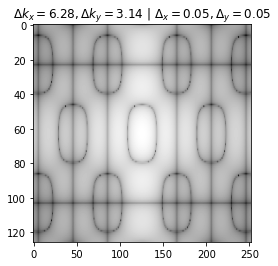

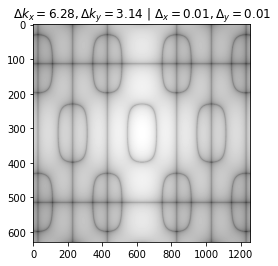

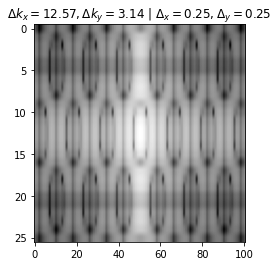

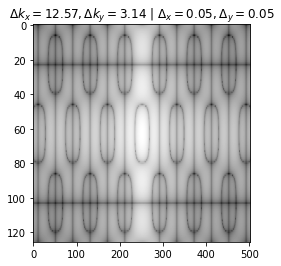

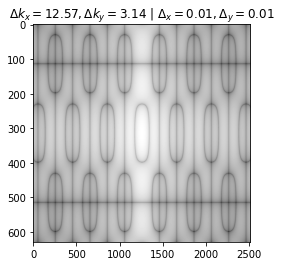

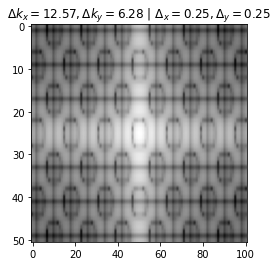

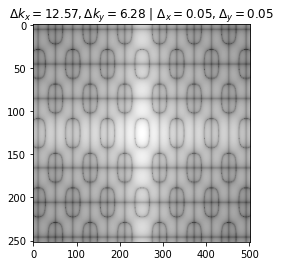

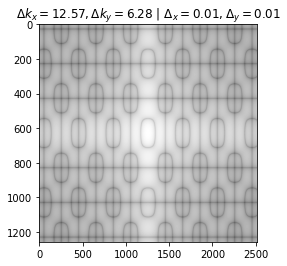

In [171]:
lista_transformadas = []

for i in range(4):
    kx, ky = lista_k[i][0], lista_k[i][1]

    for j in range(3):
        dx, dy = deltas[j][0], deltas[j][1]

        x_1 = np.arange(-kx, kx, dx)
        y_1 = np.arange(-ky, ky, dy)
        
        xx_1, yy_1 = np.meshgrid(x_1, y_1)

        escala = round(kx / ky, 0)

        fig_1 = u_transform(xx_1, yy_1) - u_transform(xx_1, yy_1, 2)

        fig = plt.figure()
        ax = fig.add_subplot(111)

        ax.imshow(np.log10(abs(fig_1)), cmap = 'gray')
        
        ax.set_aspect(escala)
        plt.title(f'$\Delta k_x = {round(kx, 2)}, \Delta k_y = {round(ky, 2)}$ | $\Delta_x = {round(dx, 2)}, \Delta_y = {round(dy, 2)}$')
        plt.show()

        lista_transformadas.append((fig_1, (kx, ky, dx, dy)))

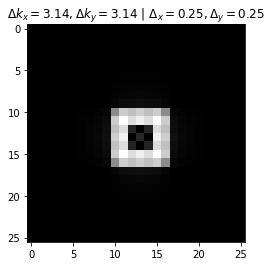

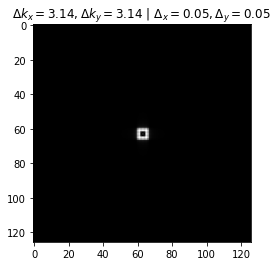

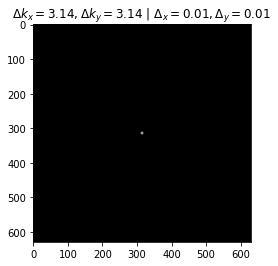

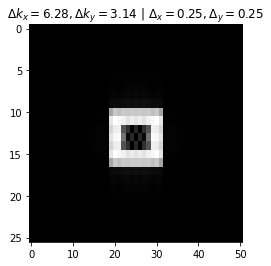

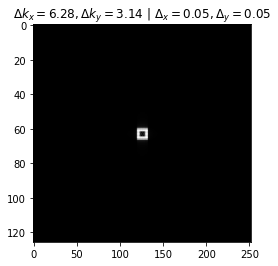

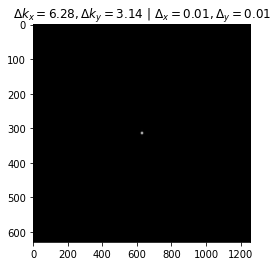

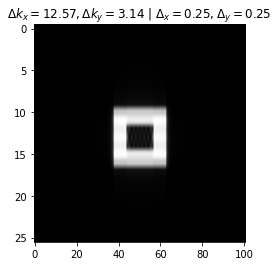

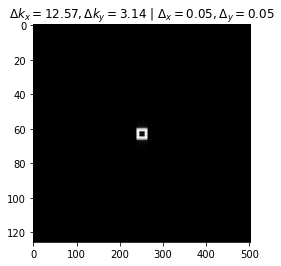

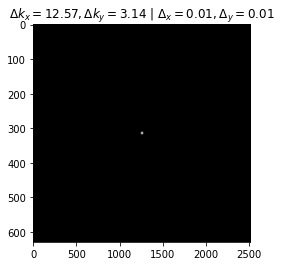

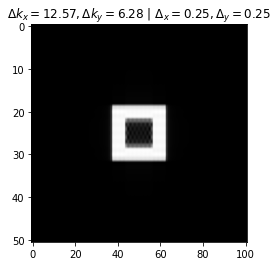

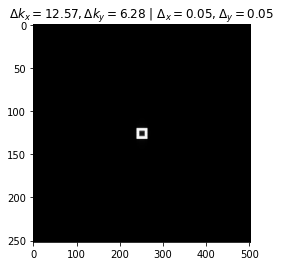

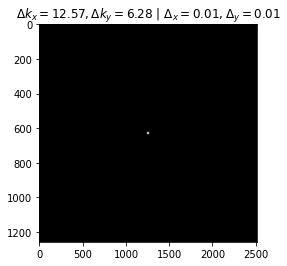

In [136]:
for figura, datos in lista_transformadas:

    kx, ky, dx, dy = datos[0], datos[1], datos[2], datos[3]
    escala = round(kx / ky, 0)

    ifft_img = ifftc(figura)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.imshow(np.log10(1 + abs(ifft_img)), cmap = 'Greys_r')
    ax.set_aspect(escala)
    plt.title(f'$\Delta k_x = {round(kx, 2)}, \Delta k_y = {round(ky, 2)}$ | $\Delta_x = {round(dx, 2)}, \Delta_y = {round(dy, 2)}$')

    plt.show()

In [139]:
def recortar(imagen, tamano):
    x, y = imagen.shape
    minimo = abs(tamano // 2 + x // 2)
    maximo = abs(tamano // 2 - x // 2)

    copia = imagen.copy()

    for i in range(x):
        for j in range(y):
            if i < maximo or j < maximo or i > minimo or j > minimo:
                copia[i][j] = 0

    return copia

In [148]:
ifft_img.shape

(1257, 2514)

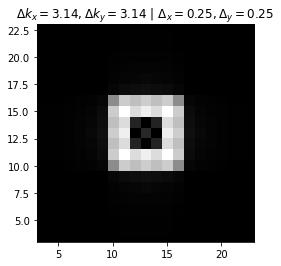

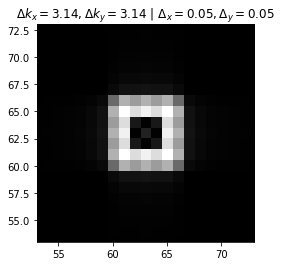

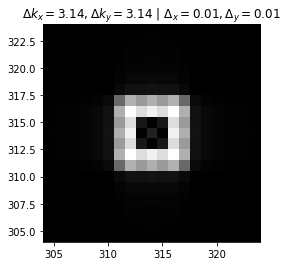

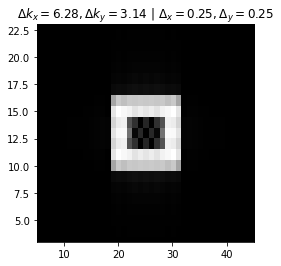

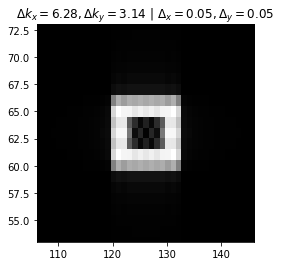

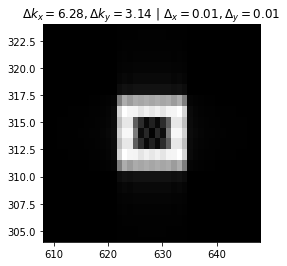

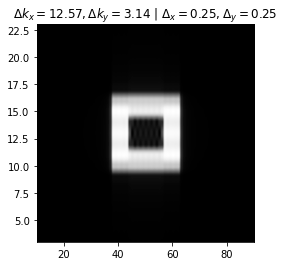

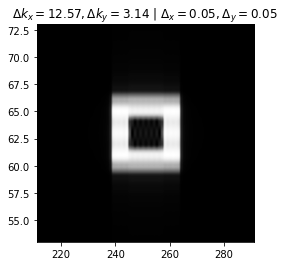

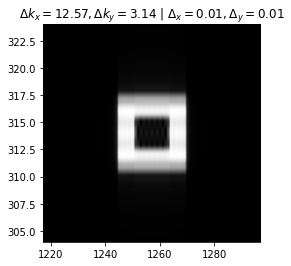

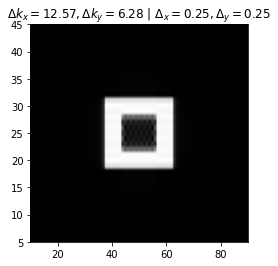

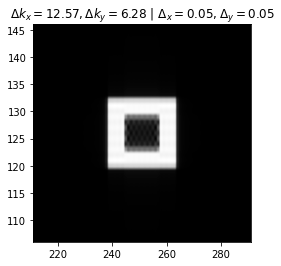

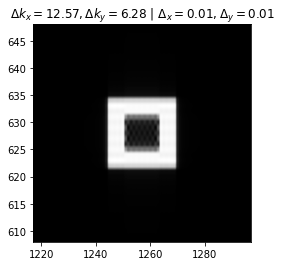

In [172]:
for figura, datos in lista_transformadas:

    kx, ky, dx, dy = datos[0], datos[1], datos[2], datos[3]
    escala = round(kx / ky, 0)

    x, y = figura.shape

    ifft_img = ifftc(figura)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlim(y // 2 - 10 * escala * round(ky / np.pi, 0), y // 2 + 10 * escala * round(ky / np.pi, 0))
    ax.set_ylim(x // 2 - 10 * round(ky / np.pi, 0), x // 2 + 10 * round(ky / np.pi, 0))

    ax.imshow(np.log10(1 + abs(ifft_img)), cmap = 'Greys_r')
    ax.set_aspect(escala)
    plt.title(f'$\Delta k_x = {round(kx, 2)}, \Delta k_y = {round(ky, 2)}$ | $\Delta_x = {round(dx, 2)}, \Delta_y = {round(dy, 2)}$')

    plt.show()

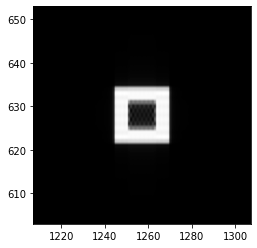

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim(1257 - 50, 1257 + 50)
ax.set_ylim(1257 // 2 - 25, 1257 // 2 + 25)


ax.imshow(np.log10(1 + abs(ifft_img)), cmap = 'Greys_r')
ax.set_aspect(escala)
plt.show()

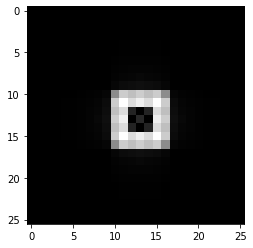

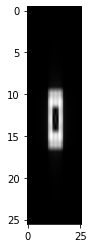

In [121]:
ifft_img = ifftc(fig1)
f = plt.figure()
plt.imshow(np.log10(1 + abs(ifft_img)), cmap = 'Greys_r')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(np.log10(1 + abs(ifft_img)), cmap = 'Greys_r')
ax.set_aspect(4)

plt.show()


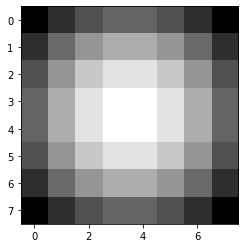

In [60]:
x1 = np.linspace(-1, 1, 8)
y1 = np.linspace(-1, 1, 8)

xx1, yy1 = np.meshgrid(x1, y1)

fig1 = u_transform(xx1, yy1)
plt.imshow(fig1, cmap = 'gray')
plt.show()

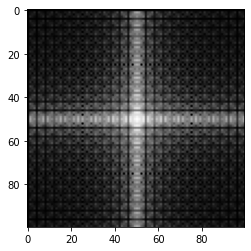

In [91]:
fft_img = fftc(figura)
plt.imshow(np.log10(1 + abs(fft_img)), cmap = 'Greys_r')
plt.show()

## Pregunta 2

In [1]:
fov_xy = 0.75
delta_xy = 0.05

In [3]:
n_xy = fov_xy / delta_xy
print(n_xy)

15.0


In [11]:
delta_r = delta_xy * np.sqrt(2) / 2
print(round(delta_r, 4))

0.0354


In [13]:
T = delta_r * n_xy
print(round(T, 4))

0.5303


In [22]:
n_theta = n_xy ** 2 / (2 * np.pi)
print(round(n_theta, 4))

0.0448
